### San Francisco Housing Rental Analysis

In [72]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv
import panel as pn
from panel.interact import interact

%matplotlib inline


In [73]:
pn.extension('plotly')

import hvplot.pandas

In [74]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX")
print(type(mapbox_token))
px.set_mapbox_access_token(mapbox_token)

<class 'str'>


In [75]:
# Load Data

file_path = Path("Data//sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


In [76]:
# Calculate the mean number of housing units per year

units_mean = sfo_data[['housing_units']].groupby('year').mean()
units_mean

,housing_units
year,
2010,372560
2011,374507
2012,376454
2013,378401
2014,380348
2015,382295
2016,384242


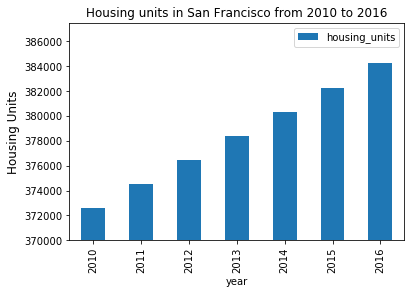

In [77]:
# Use the Pandas plot function to plot the average housing units per year.

plt = units_mean.plot.bar(title = "Housing units in San Francisco from 2010 to 2016")
plt.set_ylim([370000,387500]);
plt.set_ylabel('Housing Units', fontsize =12);

In [78]:
# Average prices per square foot

gross_rent_mean = sfo_data[['sale_price_sqr_foot', 'gross_rent']].groupby('year').mean()
gross_rent_mean.round(2)

,sale_price_sqr_foot,gross_rent
year,,
2010,369.34,1239
2011,341.90,1530
2012,399.39,2324
2013,483.60,2971
2014,556.28,3528
2015,632.54,3739
2016,697.64,4390


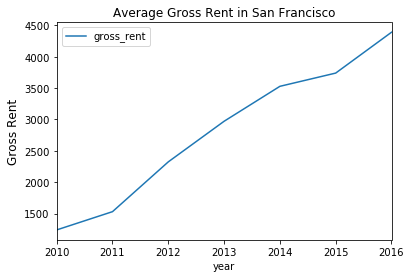

In [79]:
# Plot the Average Gross Rent per Year as a Line Chart

Avg_gross_rent_per_year = gross_rent_mean[['gross_rent']].plot(title="Average Gross Rent in San Francisco");
Avg_gross_rent_per_year.set_ylabel('Gross Rent', fontsize = 12);

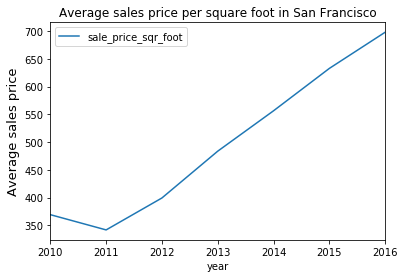

In [80]:
 # Plot the Average Sales Price per Year as a line chart
Avg_sales_price_per_year = gross_rent_mean[['sale_price_sqr_foot']].plot(title="Average sales price per square foot in San Francisco");
Avg_sales_price_per_year.set_ylabel('Average sales price', fontsize = 13);

###  Average prices by neighborhood

In [81]:
# Group by year and neighborhood and then create a new dataframe of the mean values

mean_df = pd.DataFrame()
mean_df = sfo_data.groupby(['year','neighborhood']).mean()
mean_df = mean_df.reset_index()
mean_df.columns = ['year','neighborhood','Avg_sale_price_per_sqft','Avg_housing_units','Avg_gross_rent']

mean_df

,year,neighborhood,Avg_sale_price_per_sqft,Avg_housing_units,Avg_gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
5,2010,Central Sunset,418.172493,372560,1239
6,2010,Corona Heights,369.359338,372560,1239
7,2010,Cow Hollow,569.379968,372560,1239
8,2010,Croker Amazon,165.645730,372560,1239
9,2010,Diamond Heights,456.930822,372560,1239


In [82]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood

# Define function to create plot
def avgprice_persqft(neighborhood):
    plot1 = pd.DataFrame(
        {
            "Average price per sq ft": mean_df['Avg_sale_price_per_sqft'],
            "Year": mean_df['year'],
        }
    ).sort_values(["Year", "Average price per sq ft"])

    return plot1.hvplot.line(
        x='Year', 
        y='Average price per sq ft',
        colormap="viridis",
        title="Average price per square foot by Neighborhood",
        )


# Render plot with Panel interactive widget
interact(avgprice_persqft, neighborhood=mean_df['neighborhood'])

Column
    [0] Column
        [0] Select(name='neighborhood', options=['Alamo Square', ...], value='Alamo Square')
    [1] Row
        [0] HoloViews(Curve, name='interactive02007')

### Top 10 most expensive neighborhoods

In [83]:
# Calculating top 10 priced neighborhoods

top_10=sfo_data.groupby(['neighborhood']).mean().sort_values('sale_price_sqr_foot', ascending = False)
top10 = top_10.head(10).reset_index()
top10

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Union Square District,903.993258,377427.50,2555.166667
1,Merced Heights,788.844818,380348.00,3414.000000
2,Miraloma Park,779.810842,375967.25,2155.250000
3,Pacific Heights,689.555817,378401.00,2817.285714
4,Westwood Park,687.087575,382295.00,3959.000000
5,Telegraph Hill,676.506578,378401.00,2817.285714
6,Presidio Heights,675.350212,378401.00,2817.285714
7,Cow Hollow,665.964042,378401.00,2817.285714
8,Potrero Hill,662.013613,378401.00,2817.285714
9,South Beach,650.124479,375805.00,2099.000000


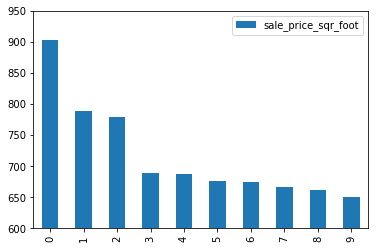

In [84]:
#Plotting top 10 priced neighborhoods

top10.head(10).plot.bar(y='sale_price_sqr_foot').set_ylim([600,950]);

###  Parallel Coordinates and Parallel Categories Analysis

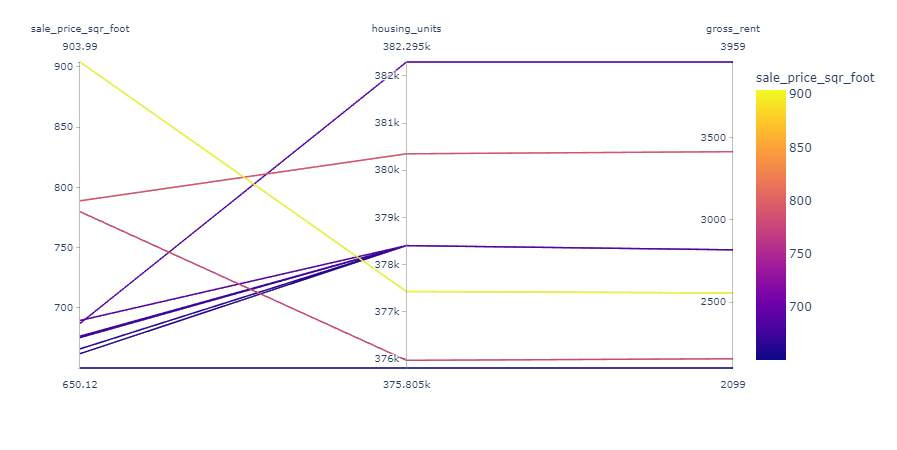

In [85]:
 # Parallel Coordinates Plot

px.parallel_coordinates(top10, color = 'sale_price_sqr_foot')

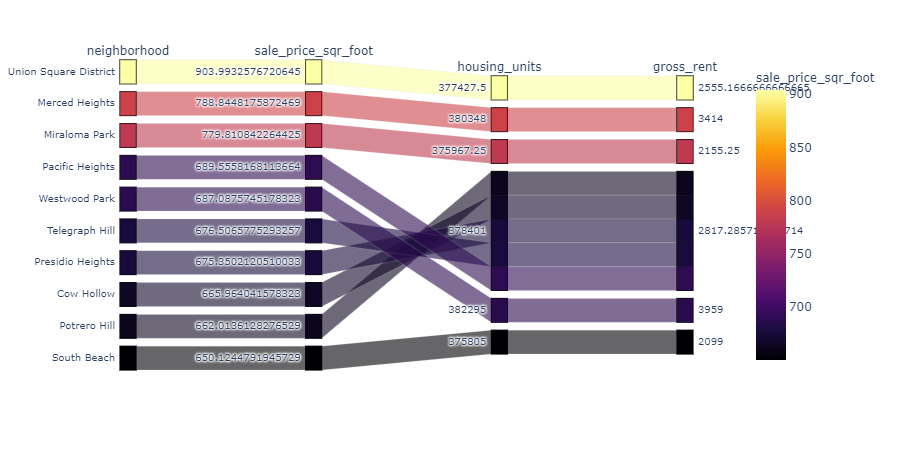

In [86]:
 # Plot data using parallel_categories
px.parallel_categories(
    top10,
    dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
)

### Neighborhood map

In [87]:
 # Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


In [88]:
# Concat dataframes
price_by_neighborhood = pd.concat([mean_df,df_neighborhood_locations],join = "inner", axis = 'columns').reset_index()
price_by_neighborhood.drop(columns=['neighborhood','index'])

,year,Avg_sale_price_per_sqft,Avg_housing_units,Avg_gross_rent,Neighborhood,Lat,Lon
0,2010,291.182945,372560,1239,Alamo Square,37.791012,-122.402100
1,2010,267.932583,372560,1239,Anza Vista,37.779598,-122.443451
2,2010,170.098665,372560,1239,Bayview,37.734670,-122.401060
3,2010,347.394919,372560,1239,Bayview Heights,37.728740,-122.410980
4,2010,319.027623,372560,1239,Bernal Heights,37.728630,-122.443050
5,2010,418.172493,372560,1239,Buena Vista Park,37.768160,-122.439330
6,2010,369.359338,372560,1239,Central Richmond,37.777890,-122.445170
7,2010,569.379968,372560,1239,Central Sunset,37.749610,-122.489990
8,2010,165.645730,372560,1239,Clarendon Heights,37.753310,-122.447030
9,2010,456.930822,372560,1239,Corona Heights,37.785530,-122.456000


### Mapbox Visualization

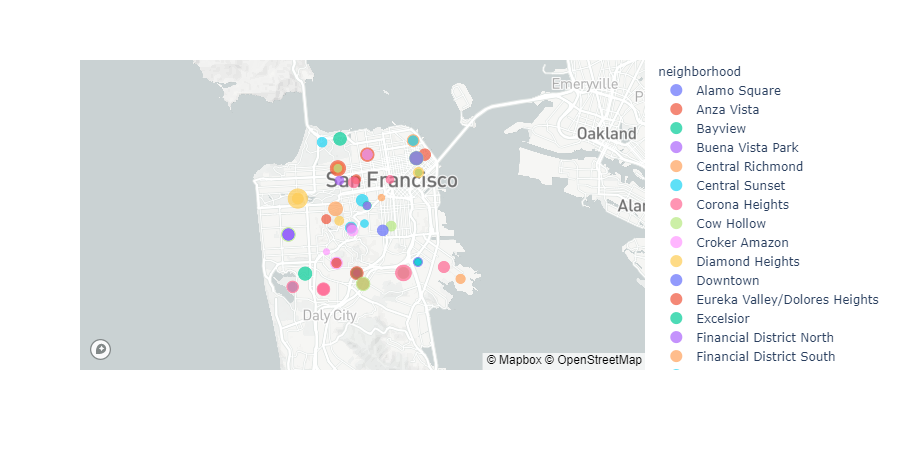

In [89]:
# Plot Data
map = px.scatter_mapbox(
    price_by_neighborhood, 
    lat="Lat", 
    lon="Lon", 
    size="Avg_sale_price_per_sqft", 
    color="neighborhood",
    color_continuous_scale=px.colors.cyclical.IceFire,
    size_max=15,
    zoom = 10
)

# Display the map
map.show()